install necessary libraries:

In [1]:
!pip install opencv-python-headless scikit-learn numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 9.4 MB/s eta 0:00:0000:0100:01m


In [133]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

recognizing green wire borders:

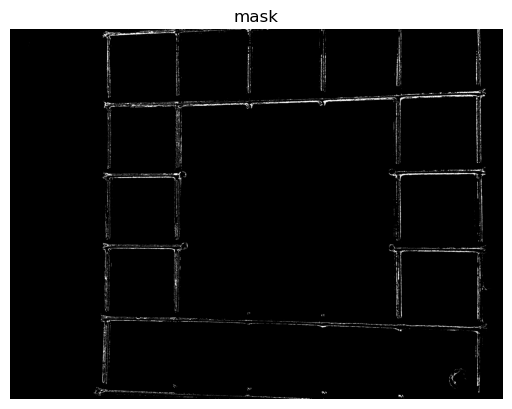

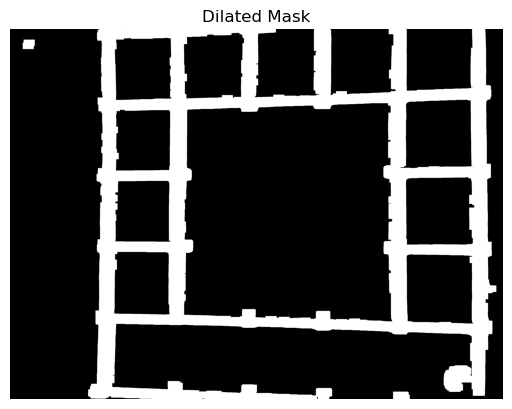

Contour 1: Area = 5113.0
Contour 2: Area = 4639.0
Contour 3: Area = 4801979.5
No valid frame detected.


In [137]:
def find_region():
    
    # define the green range for the frame
    dark_green = np.array([81, 82, 57]) 
    light_green = np.array([124, 216, 77])
    
    # create mask for green areas
    mask = cv2.inRange(barnacles_hsv, dark_green, light_green)
    
    # show mask
    plt.imshow(mask, cmap="gray")
    plt.title("mask")
    plt.axis("off")
    plt.show()

    # dilate the mask to combine nearby contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 15))  # Adjust size
    dilated_mask = cv2.dilate(mask, kernel, iterations=3)
    
    # show dilated
    plt.imshow(dilated_mask, cmap="gray")
    plt.title("Dilated Mask")
    plt.axis("off")
    plt.show()

    # find contours in the mask
    contours, _ = cv2.findContours(dilated_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        print(f"Contour {i + 1}: Area = {area}")
    
    # loop through contours to find the central frame
    for contour in contours:
        # approximate the contour to a polygon
        epsilon = 0.05 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # check if the polygon has 4 vertices (rectangle)
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(approx)
            
            # aspect ratio check
            aspect_ratio = w / float(h)
            if 0.7 < aspect_ratio < 1.3:  # center region should be roughly square
            
                if 100 < w < 1000 and 100 < h < 1000:  # check size approx.
                    print(f"Detected frame with width={w}, height={h}")
                    
                    # extract (hopefully right) region
                    region = barnacles[y:y+h, x:x+w]
                    
                    # display selected region (its wrong rn :( )
                    region_rgb = cv2.cvtColor(region, cv2.COLOR_BGR2RGB)
                    plt.imshow(region_rgb)
                    plt.title("Cropped Frame")
                    plt.axis("off")
                    plt.show()
                    
                    return region
    
    print("No valid frame detected.")
    return None

# run function to find region
barnacles = cv2.imread("Barnacles/img1.png")  # Replace with the correct path
region = find_region()